In [22]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
# simple function to save and view results
import pickle
def save_data(data,file_name):
    with open(file_name,'wb') as f:
        pickle.dump(data,f)
    print('save successfully')
def load_data(file_name):
    with open(file_name,'rb') as f:
        data = pickle.load(f)
    print('load successfully')
    return data

In [117]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 1
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x12b5c0bb0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x12ad4aaf0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x12b5c0bb0>)


In [ ]:
counts = 0
for inputs_batch, targets_batch in test_data:
    counts += 1
    print(inputs_batch.shape)
    print(targets_batch.shape)

In [119]:
print(counts)

15800


load successfully


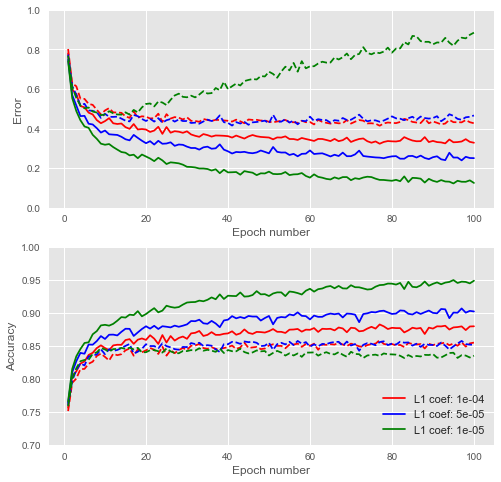

In [112]:
# L1 plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/L1.npy')
color = ['r','b','g','m','c']
L1Penalty_coefficients = [1e-04, 5e-05, 1e-05]
stats_interval = 1

fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.0,1])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='L1 coef: {0:.0e}'.format(L1Penalty_coefficients[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
#ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.7,1])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='L1 coef: {0:.0e}'.format(L1Penalty_coefficients[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
ax_4.legend(loc=4, fontsize = 11)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/L1.pdf')

load successfully


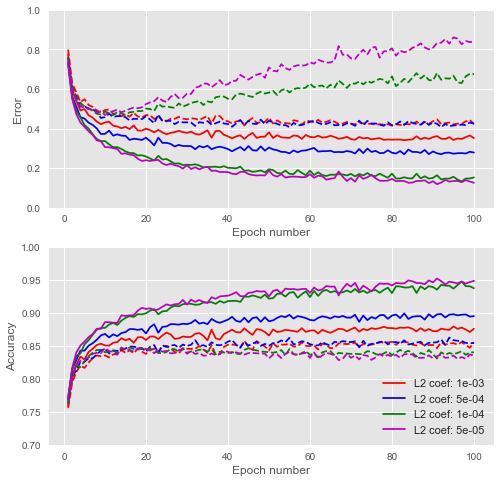

In [151]:
# L2 plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/L2.npy')
color = ['r','b','g','m','c']
L2Penalty_coefficients = [1e-03, 5e-04, 1e-04, 5e-05]
stats_interval = 1

fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.0,1])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='L2 coef: {0:.0e}'.format(L2Penalty_coefficients[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
#ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.7,1])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='L2 coef: {0:.0e}'.format(L2Penalty_coefficients[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
ax_4.legend(loc=4, fontsize = 11)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/L2.pdf')

load successfully


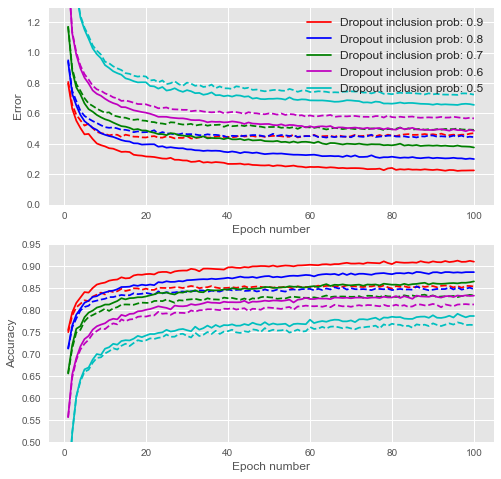

In [155]:
# Dropout plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/Dropout.npy')
color = ['r','b','g','m','c']
Drop_p = [0.9, 0.8, 0.7, 0.6, 0.5]
stats_interval = 1

fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.0,1.3])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='Dropout inclusion prob: {}'.format(Drop_p[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.5,0.95])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='Dropout inclusion prob: {}'.format(Drop_p[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
#ax_4.legend(loc=0, fontsize = 12)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/Dropout.pdf')

load successfully


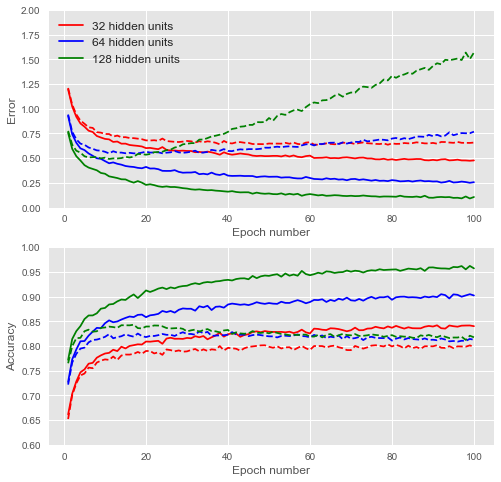

In [115]:
# Units plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/units.npy')
Units = [32, 64, 128]
stats_interval = 1

fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.0,2])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='{} hidden units'.format(Units[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)
ax_3.grid

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.6,1])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='{} hidden units'.format(Units[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
#ax_4.legend(loc=0, fontsize = 12)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/units.pdf')

load successfully


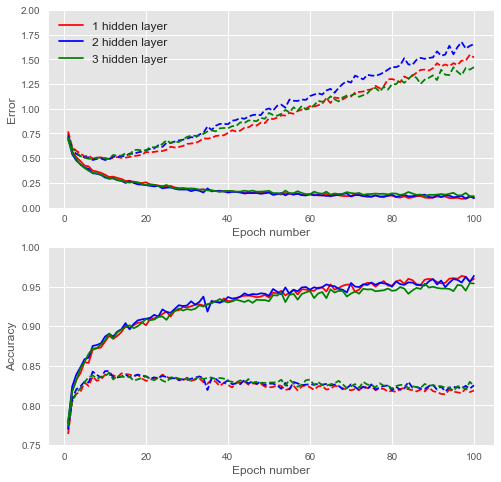

In [116]:
# Layers plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/layers.npy')
layers = [1, 2, 3]
stats_interval = 1


fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.0,2])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='{} hidden layer'.format(layers[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.75,1])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='{} hidden layer'.format(layers[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
#ax_4.legend(loc=0, fontsize = 12)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/layers.pdf')

load successfully
load successfully


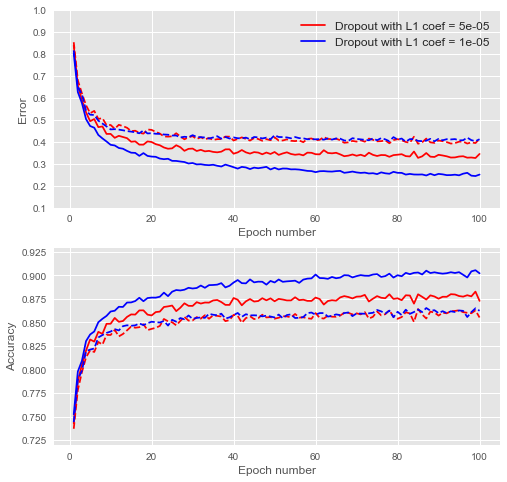

In [139]:
# Dropout90+L1 plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/Dropout_p_0.90_L15e-05.npy')
all_stats.append(load_data('stats/Dropout_p_0.90_L11e-05.npy')[0])
L1_coef = [5e-05,1e-05]
stats_interval = 1


fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.10,1])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='Dropout with L1 coef = {0:.0e}'.format(L1_coef[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.72,0.93])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='Dropout with L1 coef = {0:.0e}'.format(L1_coef[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
#ax_4.legend(loc=0, fontsize = 12)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/Dropout_p90_L1.pdf')

load successfully
load successfully


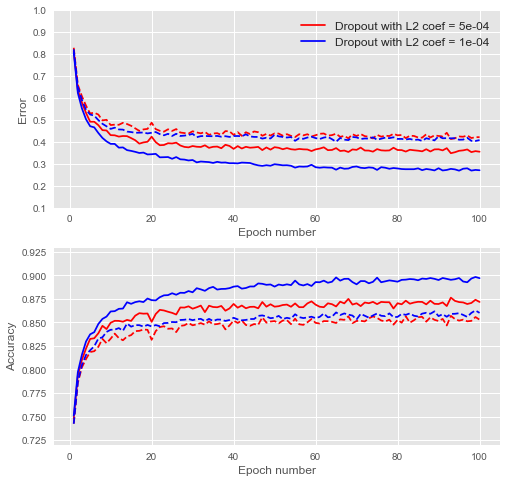

In [150]:
# Dropout90+L2 plots
import matplotlib as mpl
mpl.style.use('ggplot')

all_stats = load_data('stats/Dropout_p_0.90_L25e-04.npy')
all_stats.append(load_data('stats/Dropout_p_0.90_L21e-04.npy')[0])
L2_coef = [5e-04,1e-04]
stats_interval = 1


fig = plt.figure(figsize=(8, 8))
ax_3 = fig.add_subplot(211)
ax_3.set_ylim([0.10,1])
j = 0
for stats in all_stats:
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,0], label='Dropout with L2 coef = {0:.0e}'.format(L2_coef[j]),
              ls = '-', color = color[j])
    ax_3.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,2],ls = '--', color = color[j])
    j += 1
ax_3.legend(loc=0, fontsize = 12)
ax_3.set_xlabel('Epoch number', fontsize = 12)
ax_3.set_ylabel('Error', fontsize = 12)

ax_4 = fig.add_subplot(212)
ax_4.set_ylim([0.72,0.93])
j = 0
for stats in all_stats:
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,1], label='Dropout with L2 coef = {0:.0e}'.format(L2_coef[j]),
              ls = '-', color = color[j])
    ax_4.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:,3],ls = '--', color = color[j])
    j += 1
#ax_4.legend(loc=0, fontsize = 12)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)

fig.savefig('plots/Dropout_p90_L2.pdf')

In [148]:
all_stats = load_data('stats/Dropout_p_0.90_L21e-04.npy')
all_stats.append(load_data('stats/Dropout_p_0.90_L25e-04.npy')[0])

load successfully
load successfully


In [177]:
all_stats = load_data('stats/(test)Dropout_p_0.90_L21e-04_lr3e-04.npy')
all_stats.append(load_data('stats/layers.npy')[2])
all_stats

load successfully
load successfully


[array([[3.85433094, 0.02233   , 3.8551494 , 0.02151899],
        [1.10715027, 0.67675   , 1.12878338, 0.66392405],
        [0.82527807, 0.74545   , 0.86376107, 0.73183544],
        [0.71292102, 0.77785   , 0.75771111, 0.75949367],
        [0.63135111, 0.79801   , 0.68419093, 0.77803797],
        [0.58800094, 0.80886   , 0.64623548, 0.78873418],
        [0.55483718, 0.81674   , 0.62264476, 0.79348101],
        [0.52497848, 0.82347   , 0.59394661, 0.80234177],
        [0.49267624, 0.83349   , 0.56935492, 0.8093038 ],
        [0.47301324, 0.83901   , 0.55015217, 0.81436709],
        [0.45776764, 0.84429   , 0.53587601, 0.81810127],
        [0.44921737, 0.84624   , 0.53386181, 0.81949367],
        [0.43264723, 0.8505    , 0.52142866, 0.82253165],
        [0.43029341, 0.84952   , 0.52206972, 0.81987342],
        [0.4072568 , 0.85848   , 0.49900842, 0.8293038 ],
        [0.40063068, 0.85827   , 0.49725941, 0.82759494],
        [0.39425619, 0.86158   , 0.49250497, 0.83246835],
        [0.385

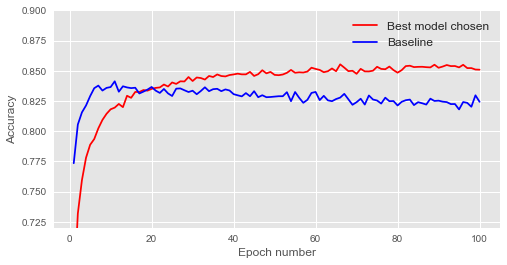

In [188]:
#all_stats = load_data('stats/(test)Dropout_p_0.90_L21e-04_lr3e-04.npy')
#all_stats.append(load_data('stats/layers.npy')[2])
stats_interval = 1

fig = plt.figure(figsize=(8, 4))
ax_4 = fig.add_subplot(111)
ax_4.set_ylim([0.72,0.90])
test = all_stats[0][1:,3]
baseline = all_stats[1][1:,3]
ax_4.plot(np.arange(1, 101) * stats_interval, 
          test, label='Best model chosen',
          ls = '-', color = color[0])
ax_4.plot(np.arange(1, 101) * stats_interval, 
          baseline, label='Baseline', ls = '-', color = color[1])
ax_4.legend(loc=0, fontsize = 12)
ax_4.set_xlabel('Epoch number', fontsize = 12)
ax_4.set_ylabel('Accuracy', fontsize = 12)
plt.show()
fig.savefig('plots/test.pdf')

In [183]:
all_stats[1][1:,3]

array([0.77348101, 0.80550633, 0.81556962, 0.82126582, 0.82898734,
       0.83556962, 0.83772152, 0.83360759, 0.83582278, 0.83651899,
       0.84126582, 0.83265823, 0.8371519 , 0.83620253, 0.83563291,
       0.83594937, 0.83120253, 0.83272152, 0.83443038, 0.83658228,
       0.8335443 , 0.83164557, 0.83493671, 0.83126582, 0.82911392,
       0.83518987, 0.83537975, 0.83386076, 0.83240506, 0.83348101,
       0.83056962, 0.83322785, 0.83632911, 0.83310127, 0.83474684,
       0.83506329, 0.83310127, 0.83455696, 0.83367089, 0.83063291,
       0.82968354, 0.82879747, 0.83151899, 0.82892405, 0.83310127,
       0.82810127, 0.82974684, 0.82810127, 0.82829114, 0.82860759,
       0.82892405, 0.82892405, 0.83227848, 0.82481013, 0.83240506,
       0.82759494, 0.82348101, 0.82594937, 0.83164557, 0.83246835,
       0.8256962 , 0.82924051, 0.82550633, 0.82481013, 0.82658228,
       0.82778481, 0.83088608, 0.82639241, 0.82183544, 0.82398734,
       0.82683544, 0.82202532, 0.82955696, 0.82620253, 0.82537